<a href="https://colab.research.google.com/github/SBJeong91/Data-Analysis-with-Open-Source/blob/main/openAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import requests

url = "http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty"
api_key = "7a4c6f74646f6a3138324d42526259"

TARGET_ENERGIES = ["전기", "가스", "수도", "지역난방"]
collected_data = []


params = {
    'serviceKey': "7a4c6f74646f6a3138324d42526259",
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

response = requests.get(url, params=params)

if response.status_code == 200:
  print("api 호출 성공")
  print(response.json())
else:
  print(f"API 호출 실패: {response.status_code}")

API 호출 실패: 401


# 새 섹션

# 새 섹션

In [8]:
import requests
import time

API_KEY = "7a4c6f74646f6a3138324d42526259"  # 본인의 API 키
BASE_URL = f"http://openapi.seoul.go.kr:8088/7a4c6f74646f6a3138324d42526259/json/energyUseDataSummaryInfo/1/5"
TARGET_ENERGIES = ["전기", "가스", "수도", "지역난방"]
collected_data = []

# 연도와 월 반복
for year in range(2015, 2025):  # 2024까지 포함
    for month in range(1, 13):
        ym = f"{year}/{month:02d}"
        url = f"http://openapi.seoul.go.kr:8088/2025/{month:02d}"
        try:
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                print(f"[✓] {ym} API 호출 성공")
                # 개인 유형 데이터만 필터링
                items = data.get("energyUseDataSummaryInfo", {}).get("row", [])
                found = False
                for item in items:
                    if item.get("USE_TYPE") == "개인":
                        energy_type = item.get("ENERGY_TYPE")
                        if energy_type in TARGET_ENERGIES:
                            collected_data.append({
                                "year": year,
                                "month": month,
                                "energy_type": energy_type,
                                "usage": item.get("USE_AMOUNT")
                            })
            else:
                print(f"[✗] {ym} API 호출 실패: {response.status_code}")
        except Exception as e:
            print(f"[!] {ym} 예외 발생: {e}")
        time.sleep(0.2)  # 과도한 요청 방지

# 결과 일부 출력
print("\n📊 수집된 데이터 샘플:")
for entry in collected_data[:10]:
    print(entry)


[✓] 2015/01 API 호출 성공
[✓] 2015/02 API 호출 성공
[✓] 2015/03 API 호출 성공
[✓] 2015/04 API 호출 성공
[✓] 2015/05 API 호출 성공
[✓] 2015/06 API 호출 성공
[✓] 2015/07 API 호출 성공
[✓] 2015/08 API 호출 성공
[✓] 2015/09 API 호출 성공
[✓] 2015/10 API 호출 성공
[✓] 2015/11 API 호출 성공
[✓] 2015/12 API 호출 성공
[✓] 2016/01 API 호출 성공
[✓] 2016/02 API 호출 성공
[✓] 2016/03 API 호출 성공
[✓] 2016/04 API 호출 성공
[✓] 2016/05 API 호출 성공
[✓] 2016/06 API 호출 성공
[✓] 2016/07 API 호출 성공
[✓] 2016/08 API 호출 성공
[✓] 2016/09 API 호출 성공
[✓] 2016/10 API 호출 성공
[✓] 2016/11 API 호출 성공
[✓] 2016/12 API 호출 성공
[✓] 2017/01 API 호출 성공
[✓] 2017/02 API 호출 성공
[✓] 2017/03 API 호출 성공
[✓] 2017/04 API 호출 성공
[✓] 2017/05 API 호출 성공
[✓] 2017/06 API 호출 성공
[✓] 2017/07 API 호출 성공
[✓] 2017/08 API 호출 성공
[✓] 2017/09 API 호출 성공
[✓] 2017/10 API 호출 성공


KeyboardInterrupt: 

**굵은 텍스트**# 새 섹션

In [31]:
import requests

API_KEY = "7a4c6f74646f6a3138324d42526259"
BASE_URL = f"http://openapi.seoul.go.kr:8088/7a4c6f74646f6a3138324d42526259/json/energyUseDataSummaryInfo/1/5"
TARGET_ENERGIES = ["전기", "가스", "수도", "지역난방"]
def get_year_months():
    year_months = []
    for year in range(2015, 2024):  # 2024 포함
        for month in range(1, 13):  # 1월부터 12월까지
            year_months.append(f'{year}{month:02d}')
    return year_months
responses = []
for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]
    url = f"{BASE_URL}/{year}/{month}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            print(f"[✓] {year}-{month} API 호출 성공")
            items = data.get("energyUseDataSummaryInfo", {}).get("row", [])
            found = False
            for item in items:
                if item.get("MM_TYPE") == "개인":
                    found = True
                    responses.append({
                        "year": year,
                        "month": month,
                        "전기": item.get("EUS"),
                        "가스": item.get("GUS"),
                        "수도": item.get("WUS"),
                        "지역난방": item.get("HUS")
                    })
            if not found:
                print(f"[i] {year}-{month} 개인 유형 데이터 없음")

        else:
            print(f"[✗] {year}-{month} API 호출 실패: {response.status_code}")
    except Exception as e:
        print(f"[!] {year}-{month} 예외 발생: {e}")

# 결과 일부 출력
print("\n[에너지 사용량 데이터 샘플 출력]")
for entry in responses:
    print(entry)
#    print("\n[수집된 월 리스트]")
#for entry in responses:
#    print(f"{entry['year']}-{entry['month']}")



[✓] 2015-01 API 호출 성공
[✓] 2015-02 API 호출 성공
[✓] 2015-03 API 호출 성공
[i] 2015-03 개인 유형 데이터 없음
[✓] 2015-04 API 호출 성공
[i] 2015-04 개인 유형 데이터 없음
[✓] 2015-05 API 호출 성공
[✓] 2015-06 API 호출 성공
[✓] 2015-07 API 호출 성공
[✓] 2015-08 API 호출 성공
[✓] 2015-09 API 호출 성공
[i] 2015-09 개인 유형 데이터 없음
[✓] 2015-10 API 호출 성공
[✓] 2015-11 API 호출 성공
[i] 2015-11 개인 유형 데이터 없음
[✓] 2015-12 API 호출 성공
[✓] 2016-01 API 호출 성공
[✓] 2016-02 API 호출 성공
[✓] 2016-03 API 호출 성공
[✓] 2016-04 API 호출 성공
[✓] 2016-05 API 호출 성공
[✓] 2016-06 API 호출 성공
[✓] 2016-07 API 호출 성공
[i] 2016-07 개인 유형 데이터 없음
[✓] 2016-08 API 호출 성공
[i] 2016-08 개인 유형 데이터 없음
[✓] 2016-09 API 호출 성공
[✓] 2016-10 API 호출 성공
[✓] 2016-11 API 호출 성공
[✓] 2016-12 API 호출 성공
[i] 2016-12 개인 유형 데이터 없음
[✓] 2017-01 API 호출 성공
[✓] 2017-02 API 호출 성공
[✓] 2017-03 API 호출 성공
[✓] 2017-04 API 호출 성공
[i] 2017-04 개인 유형 데이터 없음
[✓] 2017-05 API 호출 성공
[✓] 2017-06 API 호출 성공
[i] 2017-06 개인 유형 데이터 없음
[✓] 2017-07 API 호출 성공
[i] 2017-07 개인 유형 데이터 없음
[✓] 2017-08 API 호출 성공
[✓] 2017-09 API 호출 성공
[✓] 2017-10 API 호출 성공
[✓

# 새 섹션

In [40]:
import pandas as pd

df = pd.DataFrame(responses)
pd.set_option('display.max_rows', None)

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df['season'] = df['month'].apply(get_season)

print(" DataFrame 기본 정보:")
print(df.info())

print("\n 데이터 샘플:")
print(df.head(80))


 DataFrame 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    71 non-null     int64 
 1   month   71 non-null     int64 
 2   전기      71 non-null     object
 3   가스      71 non-null     object
 4   수도      71 non-null     object
 5   지역난방    71 non-null     object
 6   season  71 non-null     object
dtypes: int64(2), object(5)
memory usage: 4.0+ KB
None

 데이터 샘플:
    year  month         전기            가스            수도           지역난방 season
0   2015      1  193784708      59133720  12819757.886   22740838.937     겨울
1   2015      2  189974230      56487358  12656888.218   18793320.213     겨울
2   2015      5  177289769      22060892  13086734.214    1320895.801      봄
3   2015      6  186073153      12677645  14241651.402     294312.634     여름
4   2015      7  165114568       8893640  12083879.038     702863.645     여름
5   2015      8  242000479   

# 새 섹션

In [39]:
import pandas as pd

# responses 리스트를 DataFrame으로 변환
df = pd.DataFrame(responses)

# year, month를 정수형으로 변환
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

# 계절 매핑 함수 정의
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# season 컬럼 추가
df['season'] = df['month'].apply(get_season)

# 결과 출력
print("\n[전처리된 데이터 샘플]")
print(df[['year', 'month', 'season']].head(10))



[전처리된 데이터 샘플]
   year  month season
0  2015      1     겨울
1  2015      2     겨울
2  2015      5      봄
3  2015      6     여름
4  2015      7     여름
5  2015      8     여름
6  2015     10     가을
7  2015     12     겨울
8  2016      1     겨울
9  2016      2     겨울


*이탤릭체 텍스트*# 새 섹션

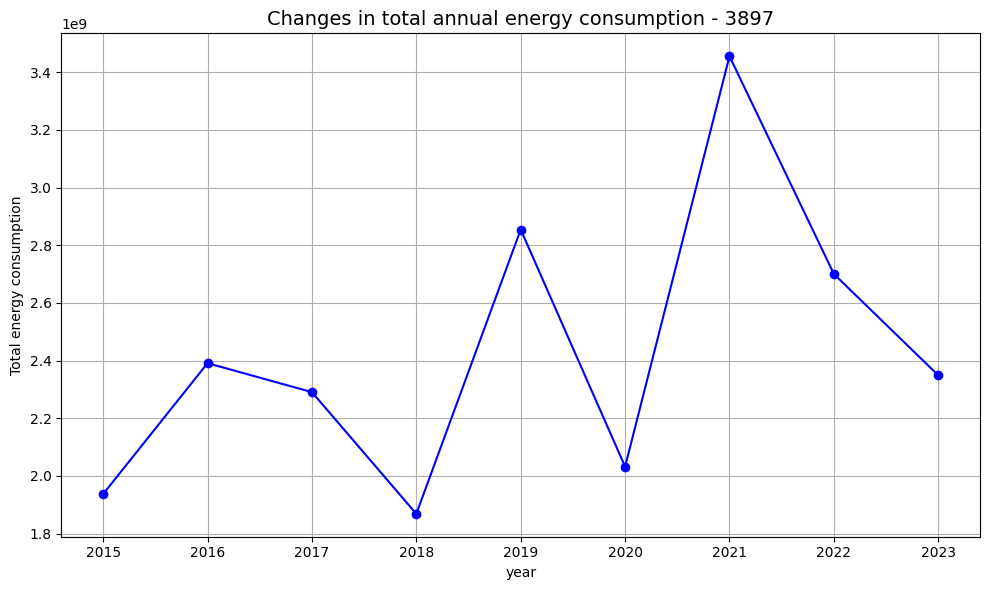

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(responses)

df['전기'] = pd.to_numeric(df['전기'], errors='coerce')
df['가스'] = pd.to_numeric(df['가스'], errors='coerce')
df['수도'] = pd.to_numeric(df['수도'], errors='coerce')
df['지역난방'] = pd.to_numeric(df['지역난방'], errors='coerce')

# 총 사용량 계산
df['총사용량'] = df['전기'] + df['가스'] + df['수도'] + df['지역난방']

# 연도별 총합 집계
yearly_usage = df.groupby('year')['총사용량'].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_usage['year'], yearly_usage['총사용량'], marker='o', linestyle='-', color='blue')
plt.title("Changes in total annual energy consumption - 3897", fontsize=14)
plt.xlabel("year")
plt.ylabel("Total energy consumption")
plt.grid(True)
plt.tight_layout()

# 그래프 저장
plt.savefig("Changes in total annual energy consumption_3897.png")
plt.show()


막대그래프


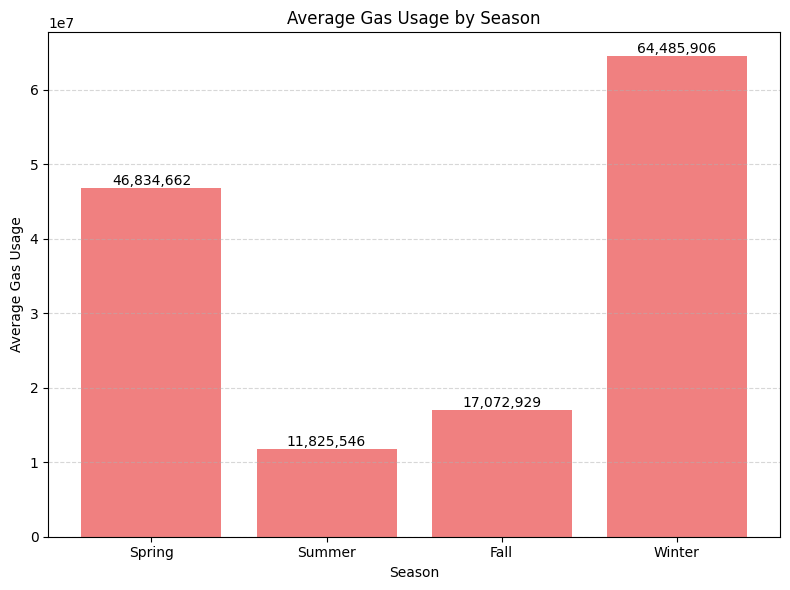

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
df = pd.DataFrame(responses)
df['가스'] = pd.to_numeric(df['가스'], errors='coerce')
df['month'] = df['month'].astype(int)

# 계절 매핑 함수 (영문)
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['season'] = df['month'].apply(get_season)

# 계절별 평균 가스 사용량 계산
seasonal_avg = df.groupby('season')['가스'].mean().reindex(['Spring', 'Summer', 'Fall', 'Winter'])

# 시각화
plt.figure(figsize=(8, 6))
bars = plt.bar(seasonal_avg.index, seasonal_avg.values, color='lightcoral')

# 수치 라벨 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.title("Average Gas Usage by Season")
plt.xlabel("Season")
plt.ylabel("Average Gas Usage")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# 그래프 저장
plt.savefig("average_gas_usage_by_season.png")
plt.show()
